In [1]:
pip install yfinance scikit-learn matplotlib pandas


Using **Linear Regression** model

/tmp/ipython-input-9-3024525631.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-9-3024525631.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


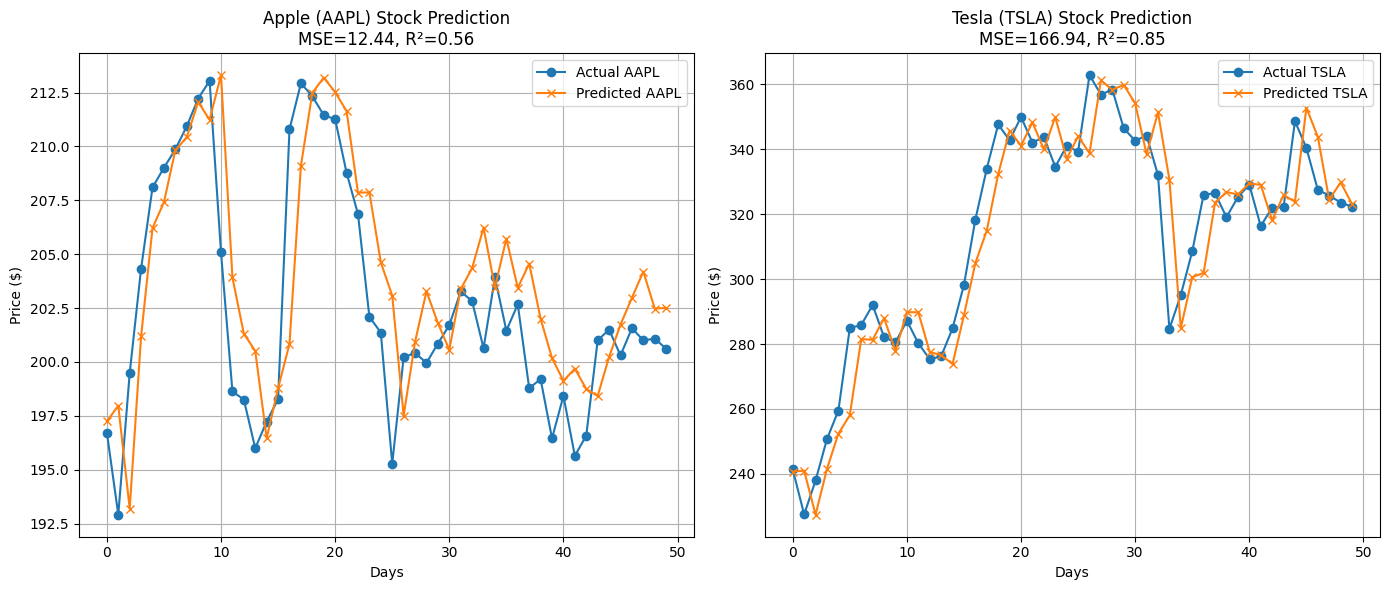

Model Comparison:
Apple (AAPL): MSE = 12.44, R² = 0.56
Tesla (TSLA): MSE = 166.94, R² = 0.85


In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def prepare_data(ticker):
    data = yf.download(ticker, period="1y")
    data['Next_Close'] = data['Close'].shift(-1)
    data.dropna(inplace=True)
    X = data[['Open', 'High', 'Low', 'Volume']]
    y = data['Next_Close']
    return train_test_split(X, y, test_size=0.2, shuffle=False), data

def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_test, y_pred, mse, r2

# 1. Load and prepare Apple data
(X_train_a, X_test_a, y_train_a, y_test_a), data_a = prepare_data('AAPL')

# 2. Load and prepare Tesla data
(X_train_t, X_test_t, y_train_t, y_test_t), data_t = prepare_data('TSLA')

# 3. Train and evaluate models
y_test_a, y_pred_a, mse_a, r2_a = train_and_evaluate(X_train_a, X_test_a, y_train_a, y_test_a)
y_test_t, y_pred_t, mse_t, r2_t = train_and_evaluate(X_train_t, X_test_t, y_train_t, y_test_t)

# 4. Plotting results
plt.figure(figsize=(14, 6))

# Apple
plt.subplot(1, 2, 1)
plt.plot(y_test_a.values, label='Actual AAPL', marker='o')
plt.plot(y_pred_a, label='Predicted AAPL', marker='x')
plt.title(f'Apple (AAPL) Stock Prediction\nMSE={mse_a:.2f}, R²={r2_a:.2f}')
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)

# Tesla
plt.subplot(1, 2, 2)
plt.plot(y_test_t.values, label='Actual TSLA', marker='o')
plt.plot(y_pred_t, label='Predicted TSLA', marker='x')
plt.title(f'Tesla (TSLA) Stock Prediction\nMSE={mse_t:.2f}, R²={r2_t:.2f}')
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 5. Print Comparison
print("Model Comparison:")
print(f"Apple (AAPL): MSE = {mse_a:.2f}, R² = {r2_a:.2f}")
print(f"Tesla (TSLA): MSE = {mse_t:.2f}, R² = {r2_t:.2f}")

Using **Random Forest Model** now

/tmp/ipython-input-10-2662996734.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-2662996734.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


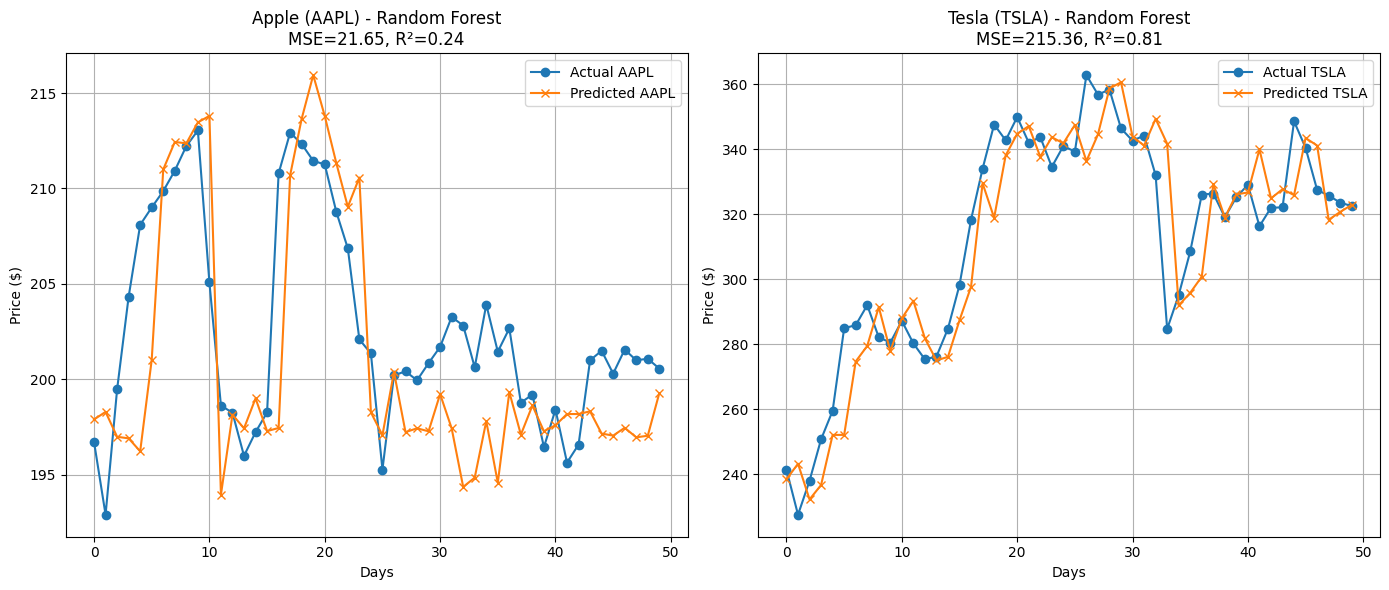

Random Forest Model Comparison:
Apple (AAPL): MSE = 21.65, R² = 0.24
Tesla (TSLA): MSE = 215.36, R² = 0.81


In [10]:
from sklearn.ensemble import RandomForestRegressor

def prepare_data(ticker):
    data = yf.download(ticker, period="1y")
    data['Next_Close'] = data['Close'].shift(-1)
    data.dropna(inplace=True)
    X = data[['Open', 'High', 'Low', 'Volume']]
    y = data['Next_Close']
    return train_test_split(X, y, test_size=0.2, shuffle=False), data

def train_and_evaluate_rf(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_test, y_pred, mse, r2

# Load and prepare data for Apple and Tesla
(X_train_a, X_test_a, y_train_a, y_test_a), data_a = prepare_data('AAPL')
(X_train_t, X_test_t, y_train_t, y_test_t), data_t = prepare_data('TSLA')

# Train and evaluate using Random Forest
y_test_a, y_pred_a, mse_a, r2_a = train_and_evaluate_rf(X_train_a, X_test_a, y_train_a, y_test_a)
y_test_t, y_pred_t, mse_t, r2_t = train_and_evaluate_rf(X_train_t, X_test_t, y_train_t, y_test_t)

# Plotting the results
plt.figure(figsize=(14, 6))

# Apple
plt.subplot(1, 2, 1)
plt.plot(y_test_a.values, label='Actual AAPL', marker='o')
plt.plot(y_pred_a, label='Predicted AAPL', marker='x')
plt.title(f'Apple (AAPL) - Random Forest\nMSE={mse_a:.2f}, R²={r2_a:.2f}')
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)

# Tesla
plt.subplot(1, 2, 2)
plt.plot(y_test_t.values, label='Actual TSLA', marker='o')
plt.plot(y_pred_t, label='Predicted TSLA', marker='x')
plt.title(f'Tesla (TSLA) - Random Forest\nMSE={mse_t:.2f}, R²={r2_t:.2f}')
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print comparison
print("Random Forest Model Comparison:")
print(f"Apple (AAPL): MSE = {mse_a:.2f}, R² = {r2_a:.2f}")
print(f"Tesla (TSLA): MSE = {mse_t:.2f}, R² = {r2_t:.2f}")

**Your Results Summary:**

**Model	            Stock	 MSE 	  R²Score**

Linear Regression	  AAPL	12.43	  0.56
Random Forest	      AAPL	21.70	  0.23
Linear Regression	  TSLA	167.03	0.85
Random Forest	      TSLA	215.37	0.81

